# Point SAGA

This notebook provides the code for drawing worst-case performance of Point SAGA and comparing it to its theoretical guarantee. This code returns the figures from the paper [...].

More precisely, the following finite sum minimization problem is considered
\begin{equation}
F_\star \triangleq \min_x \left\{F(x) \equiv \frac{1}{n} \sum_{i=1}^{n} f_i(x)\right\},
\end{equation}
where $f_1, \ldots, f_n$ are $L$-smooth and $\mu$-strongly convex functions with a proximal operator available for each of them.

The package PEPit allows to compute a tight (one-step) worst-case guarantee using a Lyapunov function for **Point SAGA**. The Lyapunov (or energy) function at a point $x$ is given by:
\begin{equation}
V(x) = \frac{1}{L \mu}\frac{1}{n} \sum_{i \leqslant n} \|\nabla f_i(x) - \nabla f_i(x_\star)\|^2_2 + \|x - x_\star\|^2_2,
\end{equation}
where $x_\star$ denotes the minimizer of $F$. The code computes the smallest possible $\tau(n, L, \mu)$ such that the guarantee (in expectation)
\begin{equation}
\mathbb{E}_{j_t}\Big[V\big(x^{(t+1)}_{j_t}\big)\Big] \leqslant \tau(n, L, \mu) V(x^{(t)}),
\end{equation}
is valid.

#### Algorithm

At each iteration $t$, Point SAGA picks $j_t \in \{1, \ldots, n\}$ uniformly at random and performs the following updates
\begin{equation*}
    \begin{aligned}
    z_{j_t}^{(t)} &= x^{(t)} + \gamma \left(g_{j_t}^{(t)} - \frac{1}{n} \sum_i g_i^{(t)}\right),\\
    x^{(t+1)}_{j_t} &= \mathrm{prox}_{\gamma f_{j_t}} \left(z_{j_t}^{(t)}\right),\\
    g_{j_t}^{(t+1)} &= \frac{1}{\gamma}\left(z_{j_t}^{(t)} - x^{(t+1)}_{j_t}\right),
    \end{aligned}
\end{equation*}
where $\gamma=\frac{\sqrt{(n - 1)^2 + 4n\frac{L}{\mu}}}{2Ln} - \frac{\left(1 - \frac{1}{n}\right)}{2L}$ is the step size.

#### Theoretical guarantee

A theoretical **upper** bound is given by
\begin{equation}
\mathbb{E}_{j_t}[V(x^{(t+1)}_{j_t})] \leqslant \frac{1}{1 + \mu\gamma} V(x^{(t)}).
\end{equation}

## Imports

First, we include the right python imports, including commmon packages and the function returning worst-case performance of Point SAGA.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PEPit

# import Point SAGA from the toolbox
import PEPit.examples.stochastic_convex_minimization.point_saga as inPSAGA

# Set the verbose parameter to False to return worst-case without details
verbose = False

## Worst-case as a function of the condition number

In [5]:
# Set the parameters

L = 1          # smoothness parameter
n = 5          # the number of functions

# Set a list of strong convesity parameter to test, given that the condition number kappa = L / mu
mus = np.array([0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001])
    


# Compute worst-case and theoretical guarantee for each iteration count
pepit_taus = np.zeros(len(mus))
theoretical_taus = np.zeros(len(mus))
for i in range(len(mus)):
    pepit_taus[i], theoretical_taus[i] = inPSAGA.wc_point_saga(L=L, 
                                                               mu=mus[i], 
                                                               n=n, 
                                                               verbose=verbose)

## Plot

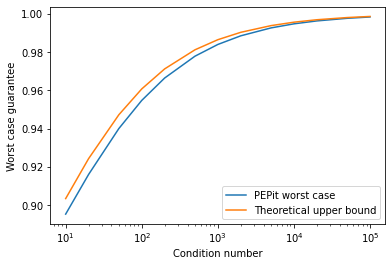

In [7]:
# Plot theoretical and PEPit worst-case performance as a function of the iteration count

plt.plot(L/mus, pepit_taus, label='PEPit worst case')
plt.plot(L/mus, theoretical_taus, label='Theoretical upper bound')

plt.semilogx()
plt.legend()
plt.xlabel('Condition number')
plt.ylabel('Worst case guarantee')

plt.show()